### Caffeine contents of Drinks
Applied Data Science, Project 2

Author:Chang Ge

#### The dataset that is going to be used is the caffeine contents of drinks from https://www.caffeineinformer.com/the-caffeine-database

The reason why I am choosing this dataset is because coffee is the biggest source of caffeine and caffeine is a part of most adults’ daily routine. I am using this dataset to look into the caffeine content of drinks from coffee, tea, energy drinks soda and shots.

For what purpose was the dataset created?
The dataset has been used for people to investigate and share caffeine content, benefits, dangers, and research. It provides complete database of caffeine products sorted by category (coffee, soda, energy drinks, tea, shots). The website also serves purposes of educating on articles exploring caffeine’s positive and negative effects, withdrawal and overdose symptoms and potential for addition. 


Who created this dataset?
www.caffeineinformer.com. Caffeine Informer.com is a website of statistical data on the amount of caffeine in food and energy drinks. This is a place for real and useful facts and info on caffeine containing products and to find out what a safe amount to drink really is. The website’s mission is “to inform and educate the customers about the risks of caffeine, and provide comprehensive and accurate resources of caffeine amounts” 

•	Dataset Composition
There are pictures of the products being reviewed. It shows what product the website reviews and how it looks like on the market. Besides, there are graphs showing the caffeine level, and also different aspects of the reviews, such as its flavor, effect and how it compares with other food.

•	Data Collection Process
Caffeine Informer has 3.5K fans on Facebook and 1.3K followers on Twitter. Looking over the Twitter of caffeine informer.com, they review the caffeine content of the products and add the information into their database. They will review the caffeinated product once it is on the market, or companies send them their product for reviews. Then, they keep the database updated. The website also provides a channel for public to email them the product they would like them to review the caffeine content and should be added into the database. 
 
Who funded the creation of the dataset?
James Foster is the main person manages the site. He maintains the dataset and also keeps it updated. He has been a writer and blogger for a number of web sites for over a decade. He also writes for the electric vehicle blog EV Rater. Besides James, Ted Kallmyer is the caffeine expert and previous to working at Caffeine Informer spent 12 years as a biology/ health educator for the public school system. He is a healthy eating and exercise advocate and loves educating people about what’s in the food they are eating and how to live healthier lives. 

•	What preprocessing/ cleaning was done?
The caffeine data was collected from individual product, so there is preprocessing process of getting the information they need for their database from the label. 


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [59]:
rod = pd.read_csv('Caffeinedata2.csv')
rod = rod.reset_index(drop=True)

In [60]:
rod.head()

,name,volume,caffeine,density,type
0,1 oz Pure Liquid Caffeine,1.00,500,500.0,coffee
1,10 Hour Energy Shot,1.93,422,218.7,shot
2,28 Black Energy Drink,8.46,80,9.5,energy
3,4C Energy Liquid Water Enhancers,8.00,60,7.5,energy
4,4C Energy Rush,8.00,80,10.0,energy


In [36]:
pd.DataFrame(rod.density.describe())

,density
count,651.000000
mean,20.762366
std,50.698684
min,0.000000
25%,4.100000
50%,9.500000
75%,12.650000
max,714.300000


By looking at total of 651 drinks, the average caffeine content is 20.77mg/oz.

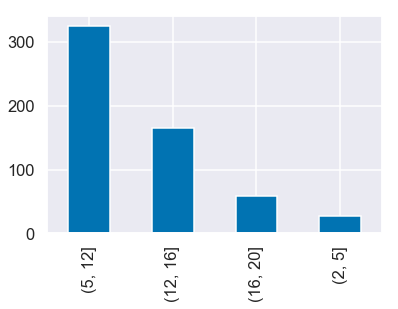

In [37]:
bins = [2,5,12,16,20]
a = pd.cut(rod["volume"], bins = bins)
a.value_counts().plot(kind = "bar")

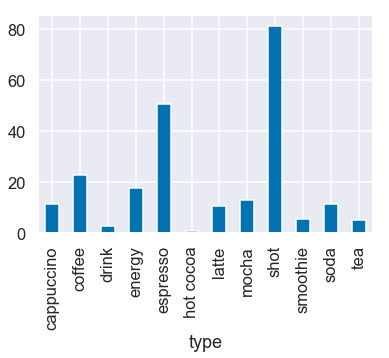

In [38]:
rod.groupby(['type'])['density'].mean().plot(kind='bar')

In [84]:
rodNames1 = rod[ rod['type'] == 'soda'].index
rodNames1 = rod[ rod['type'] == 'tea'].index
rod.drop(rodNames , inplace=True)
rod.head(10)

,name,volume,caffeine,density,type
0,1 oz Pure Liquid Caffeine,1.00,500,500.0,coffee
2,28 Black Energy Drink,8.46,80,9.5,energy
3,4C Energy Liquid Water Enhancers,8.00,60,7.5,energy
4,4C Energy Rush,8.00,80,10.0,energy
5,5 Alarm Energy Shot,2.00,100,50.0,energy
6,5 Hour Energy,2.00,200,100.0,energy
7,5 Hour Energy Decaf,2.00,6,3.0,energy
8,50 Cal Energy Shot,2.00,120,60.0,energy
11,7-Up,12.00,0,0.0,soda
12,A&W Cream Soda,12.00,29,2.4,soda


Shot contains the most caffeine content, then is espresso and coffee drinks.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

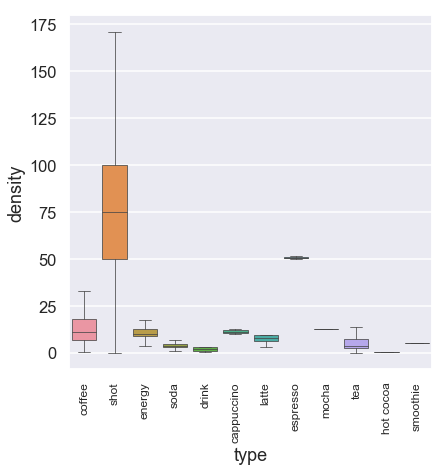

In [39]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(x="type", y="density", data=rod, fliersize=0.5, linewidth=0.75, ax=ax, showfliers = False)
plt.xticks(fontsize = 12, rotation = 'vertical')

Since shot and espresso are skweing the dataplot, need to be deleted and cleaned up. 

In [70]:
rodNames = rod[ rod['type'] == 'shot'].index
rodNames = rod[ rod['type'] == 'espresso'].index
rod.drop(rodNames , inplace=True)
rod.head(5)

,name,volume,caffeine,density,type
0,1 oz Pure Liquid Caffeine,1.00,500,500.0,coffee
2,28 Black Energy Drink,8.46,80,9.5,energy
3,4C Energy Liquid Water Enhancers,8.00,60,7.5,energy
4,4C Energy Rush,8.00,80,10.0,energy
5,5 Alarm Energy Shot,2.00,100,50.0,energy


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

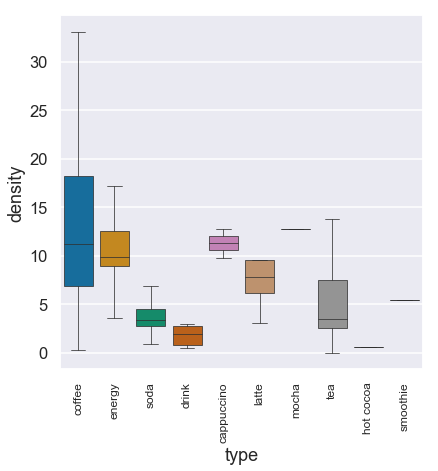

In [71]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(x="type", y="density", data=rod, fliersize=0.5, linewidth=0.75, ax=ax, showfliers = False)
plt.xticks(fontsize = 12, rotation = 'vertical')

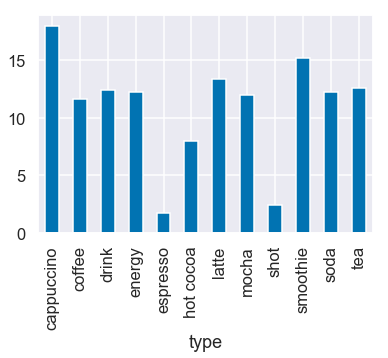

In [41]:
rod.groupby(['type'])['volume'].mean().plot(kind='bar')

In [90]:
rod[rod['type'] == 'tea']

,name,volume,caffeine,density,type


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text xticklabel objects>)

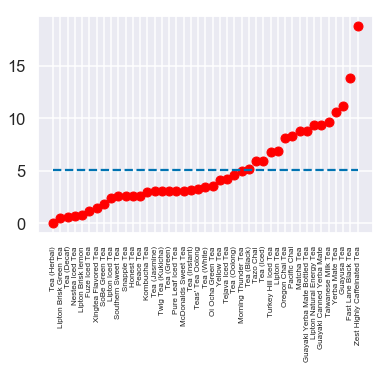

In [43]:
sub = (rod[rod['type'] == 'tea']).sort_values(by = 'density')
sub['mean'] = sub['density'].mean()
plt.plot(sub['name'], sub['density'], 'ro')
plt.plot(sub['name'], sub['mean'], linestyle = '--')
plt.xticks(fontsize = 8, rotation = 'vertical')

In [44]:
rod[rod['type'] == 'energy']

,name,volume,caffeine,density,type
2,28 Black Energy Drink,8.46,80,9.5,energy
3,4C Energy Liquid Water Enhancers,8.00,60,7.5,energy
4,4C Energy Rush,8.00,80,10.0,energy
5,5 Alarm Energy Shot,2.00,100,50.0,energy
6,5 Hour Energy,2.00,200,100.0,energy
7,5 Hour Energy Decaf,2.00,6,3.0,energy
8,50 Cal Energy Shot,2.00,120,60.0,energy
15,Ace Energy Drink,16.00,160,10.0,energy
17,Acute Fruit Energy Drink,15.50,213,13.7,energy
23,Amp Energy Drink,16.00,142,8.9,energy


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

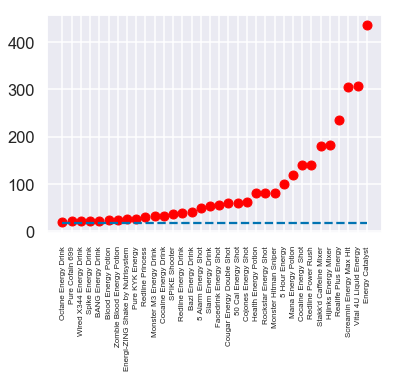

In [45]:
sub = (rod[rod['type'] == 'energy']).sort_values(by = 'density')
mean = sub['density'].mean()
sub = (sub[sub['density'] > mean])
sub['mean'] = mean
plt.plot(sub['name'], sub['density'], 'ro')
plt.plot(sub['name'], sub['mean'], linestyle = '--')
plt.xticks(fontsize = 8, rotation = 'vertical')

In [46]:
rod[rod['type'] == 'shot']


,name,volume,caffeine,density,type
1,10 Hour Energy Shot,1.93,422,218.7,shot
9,6 Hour Power,2.03,125,61.6,shot
10,7-Eleven Energy Shot,2.00,200,100.0,shot
16,Active Brain Energy Shot,0.75,68,90.7,shot
20,ALRI Hypershot,2.00,500,250.0,shot
22,Ammo Energy Shot,1.00,171,171.0,shot
28,AriZona Extreme Energy Shot,8.30,100,12.0,shot
73,Brain TonIQ,8.40,0,0.0,shot
93,CHARGE! Super Shot,2.00,200,100.0,shot
130,Demon Energy Shot,2.03,200,98.5,shot


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

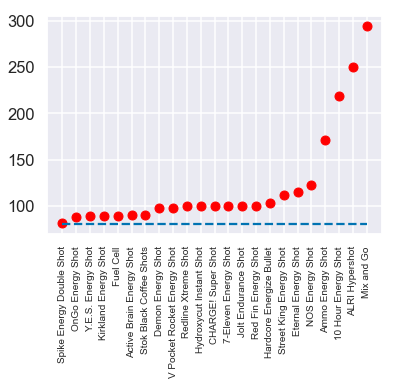

In [47]:
sub = (rod[rod['type'] == 'shot']).sort_values(by = 'density')
mean = sub['density'].mean()
sub = (sub[sub['density'] > mean])
sub['mean'] = mean
plt.plot(sub['name'], sub['density'], 'ro')
plt.plot(sub['name'], sub['mean'], linestyle = '--')
plt.xticks(fontsize = 10, rotation = 'vertical')

In [48]:
rod[rod['type'] == 'coffee']

,name,volume,caffeine,density,type
0,1 oz Pure Liquid Caffeine,1.000,500,500.0,coffee
21,Americano Coffee,12.000,154,12.8,coffee
46,Bean and Body Coffee,8.000,72,9.0,coffee
51,Big Train Java Chip Ice Coffee,8.000,49,6.1,coffee
53,Biggby Brewed Coffee,16.000,200,12.5,coffee
57,Biggby Iced Coffee,16.000,192,12.0,coffee
77,Bulletproof Coffee,8.000,145,18.1,coffee
81,Cafe Viva Probiotic Coffee,8.000,125,15.6,coffee
83,Caffe Nero Coffee,12.000,80,6.7,coffee
90,Caribou Brewed Coffee,16.000,305,19.1,coffee


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

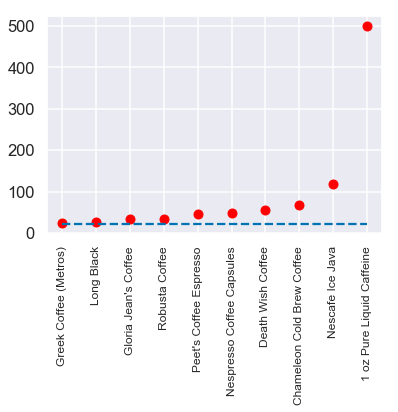

In [49]:
sub = (rod[rod['type'] == 'coffee']).sort_values(by = 'density')
mean = sub['density'].mean()
sub = (sub[sub['density'] > mean])
sub['mean'] = mean
plt.plot(sub['name'], sub['density'], 'ro')
plt.plot(sub['name'], sub['mean'], linestyle = '--')
plt.xticks(fontsize = 12, rotation = 'vertical')

In [50]:
rod[rod['type'] == 'soda']

,name,volume,caffeine,density,type
11,7-Up,12.00,0,0.0,soda
12,A&W Cream Soda,12.00,29,2.4,soda
13,A&W Root Beer,12.00,0,0.0,soda
18,Afri Cola,12.00,89,7.4,soda
19,Ale 8 1,12.00,37,3.1,soda
36,Barq's Red Creme Soda,12.00,0,0.0,soda
37,Barq's Root Beer,12.00,23,1.9,soda
41,Bawls,10.00,67,6.7,soda
42,Bawls Cherry,16.00,100,6.2,soda
43,Bawls Exxtra,16.00,150,9.4,soda


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

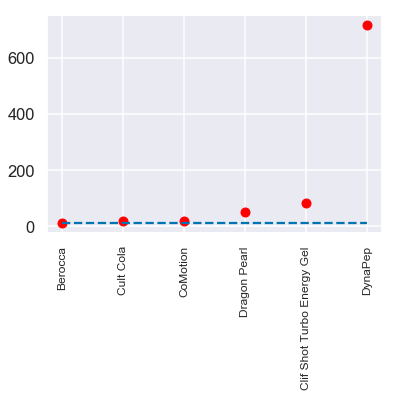

In [51]:
sub = (rod[rod['type'] == 'soda']).sort_values(by = 'density')
mean = sub['density'].mean()
sub = (sub[sub['density'] > mean])
sub['mean'] = mean
plt.plot(sub['name'], sub['density'], 'ro')
plt.plot(sub['name'], sub['mean'], linestyle = '--')
plt.xticks(fontsize = 12, rotation = 'vertical')